In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import model_selection

In [4]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
import math

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
from scipy import stats

In [8]:
def get_clusters(X):
    """
    Find clusters of the weather data.
    """
    model = make_pipeline(
        KMeans(n_clusters=2)
    )
    model.fit(X)
    return model.predict(X)


In [9]:
def get_pca(X):
    """
    Transform data to 2D points for plotting. Should return an array with shape (n, 2).
    """
    flatten_model = make_pipeline(
        PCA(n_components=250)
    )
    X = flatten_model.fit_transform(X)
    assert X.shape == (X.shape[0], 250)
    return X

In [10]:
data = pd.read_csv('image_labeled.csv')

In [11]:
df2 = data

In [12]:
# use pandas build in function to add column "if_none"
# True when weather is none
ans = pd.isnull(df2['weather'])
df2['if_none'] = ans


In [13]:
weather = df2['weather']
if_none = df2.iloc[:,-1]
weather = np.array(weather)
edge1 = np.array(df2['edge_count'])
lum1 = np.array(df2['avg_l'])

collect = []
for i in range (0,len(if_none)):
    if not(if_none[i]):
        collect.append(i)


# plot histogram

In [14]:
X_edge = edge1[collect]
y_edge = weather[collect]


In [15]:
X_lum = lum1[collect]
y_lum = weather[collect]


2602.40595238 1722.99553571 876.255354201


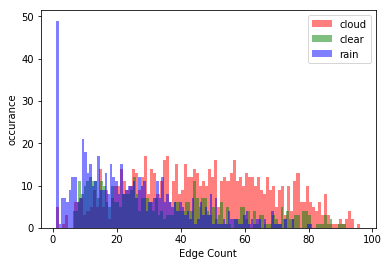

In [16]:
cloud_collect = []
other_collect = []
for j in range (0,len(X_edge)):
    if (y_edge[j] == 'Cloudy'):
        cloud_collect.append(j)
    else:
        other_collect.append(j)
clear_collect = []
for j in range (0,len(X_edge)):
    if (y_edge[j] == 'Clear'):
        clear_collect.append(j)

rain_collect = []
for j in range (0,len(X_edge)):
    if (y_edge[j] == 'Rain'):
        rain_collect.append(j)
        
X_edge_cloud = X_edge[cloud_collect]+1
X_edge_other = X_edge[other_collect]+1
X_edge_clear = X_edge[clear_collect]+1
X_edge_rain = X_edge[rain_collect]+1

X_edge_cloud_root = np.sqrt(X_edge_cloud)
X_edge_clear_root = np.sqrt(X_edge_clear)
X_edge_rain_root = np.sqrt(X_edge_rain)



y_edge_cloud = y_edge[cloud_collect]
y_edge_other = y_edge[other_collect]

print(np.mean(X_edge_cloud),
np.mean(X_edge_clear),
np.mean(X_edge_rain))

plt.xlabel('Edge Count')
plt.ylabel('occurance')
plt.hist(X_edge_cloud_root,bins  = 100,color = 'red',alpha=0.5)
#plt.show()
plt.xlabel('Edge Count')
plt.ylabel('occurance')
plt.hist(X_edge_clear_root,bins  = 100,color = 'green',alpha=0.5)
#plt.show()
plt.xlabel('Edge Count')
plt.ylabel('occurance')
plt.hist(X_edge_rain_root,bins  = 100,color = 'blue',alpha=0.5)
plt.legend(['cloud','clear','rain'])
plt.show()

170.701095466 148.586511183 177.869720648


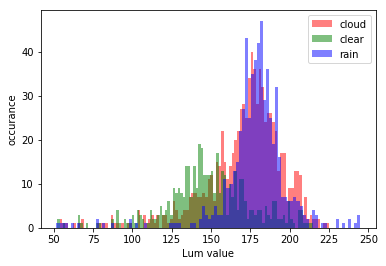

In [17]:
cloud_collect = []
other_collect = []
for j in range (0,len(X_lum)):
    if (y_lum[j] == 'Cloudy'):
        cloud_collect.append(j)
    else:
        other_collect.append(j)
clear_collect = []
for j in range (0,len(X_lum)):
    if (y_lum[j] == 'Clear'):
        clear_collect.append(j)

rain_collect = []
for j in range (0,len(X_lum)):
    if (y_lum[j] == 'Rain'):
        rain_collect.append(j)
        
X_lum_cloud = X_lum[cloud_collect]+1
X_lum_other = X_lum[other_collect]+1
X_lum_clear = X_lum[clear_collect]+1
X_lum_rain = X_lum[rain_collect]+1

y_lum_cloud = y_lum[cloud_collect]
y_lum_other = y_lum[other_collect]

print(np.mean(X_lum_cloud),
np.mean(X_lum_clear),
np.mean(X_lum_rain))

plt.xlabel('Lum value')
plt.ylabel('occurance')
plt.hist(X_lum_cloud,bins  = 100,color = 'red',alpha=0.5)
#plt.show()
plt.xlabel('Lum value')
plt.ylabel('occurance')
plt.hist(X_lum_clear,bins  = 100,color = 'green',alpha=0.5)
#plt.show()
plt.xlabel('Lum value')
plt.ylabel('occurance')
plt.hist(X_lum_rain,bins  = 100,color = 'blue',alpha=0.5)
plt.legend(['cloud','clear','rain'])

plt.show()

In [18]:
stats.levene(X_edge_cloud,X_edge_rain)

LeveneResult(statistic=222.80600119279944, pvalue=5.7741442431198953e-47)

In [19]:
stats.ttest_ind(X_edge_cloud,X_edge_other)

Ttest_indResult(statistic=16.269570672341008, pvalue=8.2798625189416448e-56)

# use all data

In [20]:
y = pd.DataFrame(df2['weather_re'])
y ['if_none'] = df2['if_none']

In [21]:
X = df2.iloc[0:,8:-1]
y1 = np.array(y)
X = np.array(X.values)
X2 = get_pca(X)


In [22]:
edgeVal = np.array(df2.iloc[:,7])
edgeVal = (edgeVal)
lumVal = np.array(df2.iloc[:,8])
lumVal = (lumVal)
df_x2 = pd.DataFrame(X2)
df_x2['edge_value'] = edgeVal
df_x2['lum'] = lumVal
X3 = np.array(df_x2)

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X3, y1)
y_train = y_train[:,0]
collect2 = []
for i in range (0,len(y_test)):
    if not(y_test[i,1]):
        collect2.append(i)
X_test = X_test[collect2]
y_test = y_test[collect2,0]

In [24]:
#Naive bayse
clf = GaussianNB()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.474358974359


In [25]:
error_collect = []
for i in range (0,20):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X3, y1)
    y_train = y_train[:,0]
    collect2 = []
    for i in range (0,len(y_test)):
        if not(y_test[i,1]):
            collect2.append(i)
    X_test = X_test[collect2]
    y_test = y_test[collect2,0]
    #KNN
    arr = []
    for i in range (1,100,10):
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(X_train, y_train) 
        arr.append((KNN.score(X_test,y_test),i))
    error_collect.append((arr))


In [26]:
xy = np.array(error_collect)
z = xy[:,:,0]
for i in range(0,10):
    print(np.mean(z[:,i]),10*i+1)

0.655239332807 1
0.699747576178 11
0.696486099978 21
0.695912089938 31
0.693595156678 41
0.687997401727 51
0.687512374862 61
0.683884202701 71
0.682098709676 81
0.683251824276 91


In [27]:
#KNN
# record all errors for one iteration
arr2 = []
KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train, y_train) 
for i in range (0,len(y_test)):
    pred = KNN.predict([X_test[i]])
    if (pred[0] != y_test[i]):
        arr2.append([pred[0],y_test[i]])
arr2 = np.array(arr2)

In [28]:
cloudy =0
rain =0
clear =0
snow =0

cloudy2 =0
rain2 =0
clear2 =0
snow2 =0

cloudy3 =0
rain3 =0
clear3 =0
snow3 =0
for i in range(len(arr2)):
    if (arr2[i,0] == 'Cloudy'):
        cloudy += 1
    elif (arr2[i,0] == 'Rain'):
        rain += 1    
    elif (arr2[i,0] == 'Clear'):
        clear += 1   
    elif (arr2[i,0] == 'Snow'):
        snow += 1   
        
for i in range(len(arr2)):
    if (arr2[i,1] == 'Cloudy'):
        cloudy2 += 1
    elif (arr2[i,1] == 'Rain'):
        rain2 += 1    
    elif (arr2[i,1] == 'Clear'):
        clear2 += 1   
    elif (arr2[i,1] == 'Snow'):
        snow2 += 1   
        
for i in range(len(y_test)):
    if (y_test[i] == 'Cloudy'):
        cloudy3 += 1
    elif (y_test[i] == 'Rain'):
        rain3 += 1    
    elif (y_test[i] == 'Clear'):
        clear3 += 1   
    elif (y_test[i] == 'Snow'):
        snow3 += 1   
        
print ('Weathers: ','cloudy', 'rain', 'clear', 'snow')        
print ('mistake predict: ',cloudy, rain, clear, snow)
print ('not recognized weather: ',cloudy2, rain2, clear2, snow2)
print ('total test samples : ',cloudy3, rain3, clear3, snow3)

Weathers:  cloudy rain clear snow
mistake predict:  86 28 26 0
not recognized weather:  52 70 18 0
total test samples :  207 151 111 0


In [40]:
#SVC
error_collect = []
for i in range (0,20):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X3, y1)
    y_train = y_train[:,0]
    collect2 = []
    for i in range (0,len(y_test)):
        if not(y_test[i,1]):
            collect2.append(i)
    X_test = X_test[collect2]
    y_test = y_test[collect2,0]
    for i in range (1,100,10):
        j = 100000
        while(j <= 10000000000):
            #useless when j < 100000
            svc_model = SVC(C=i,gamma = 1/j)
            svc_model.fit(X_train, y_train) 
            print((svc_model.score(X_test,y_test),i,j))
            error_collect.append((svc_model.score(X_test,y_test),i,j))
            j = 10*j

(0.44025157232704404, 1, 100000)
(0.57232704402515722, 1, 1000000)
(0.689727463312369, 1, 10000000)
(0.69811320754716977, 1, 100000000)
(0.59748427672955973, 1, 1000000000)
(0.59748427672955973, 1, 10000000000)
(0.44025157232704404, 11, 100000)
(0.59329140461215935, 11, 1000000)
(0.70440251572327039, 11, 10000000)
(0.71698113207547165, 11, 100000000)
(0.70020964360587001, 11, 1000000000)
(0.58909853249475896, 11, 10000000000)
(0.44025157232704404, 21, 100000)
(0.59329140461215935, 21, 1000000)
(0.69811320754716977, 21, 10000000)
(0.71069182389937102, 21, 100000000)
(0.72117400419287214, 21, 1000000000)
(0.58700209643605872, 21, 10000000000)
(0.44025157232704404, 31, 100000)
(0.59329140461215935, 31, 1000000)
(0.70649895178197064, 31, 10000000)
(0.70230607966457026, 31, 100000000)
(0.72746331236897277, 31, 1000000000)
(0.59748427672955973, 31, 10000000000)
(0.44025157232704404, 41, 100000)
(0.59329140461215935, 41, 1000000)
(0.70230607966457026, 41, 10000000)
(0.69182389937106914, 41, 1

(0.73516949152542377, 71, 1000000000)
(0.69703389830508478, 71, 10000000000)
(0.42161016949152541, 81, 100000)
(0.57415254237288138, 81, 1000000)
(0.69279661016949157, 81, 10000000)
(0.70550847457627119, 81, 100000000)
(0.73516949152542377, 81, 1000000000)
(0.71186440677966101, 81, 10000000000)
(0.42161016949152541, 91, 100000)
(0.57415254237288138, 91, 1000000)
(0.69491525423728817, 91, 10000000)
(0.70127118644067798, 91, 100000000)
(0.73940677966101698, 91, 1000000000)
(0.72457627118644063, 91, 10000000000)
(0.45435684647302904, 1, 100000)
(0.5705394190871369, 1, 1000000)
(0.67012448132780078, 1, 10000000)
(0.68672199170124482, 1, 100000000)
(0.59336099585062241, 1, 1000000000)
(0.58091286307053946, 1, 10000000000)
(0.45850622406639002, 11, 100000)
(0.58713692946058094, 11, 1000000)
(0.67634854771784236, 11, 10000000)
(0.69294605809128629, 11, 100000000)
(0.68879668049792531, 11, 1000000000)
(0.58713692946058094, 11, 10000000000)
(0.45850622406639002, 21, 100000)
(0.58713692946058094

KeyboardInterrupt: 

In [81]:
#SVC
result = []
for i in range (0,20):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X3, y1)
    y_train = y_train[:,0]
    collect2 = []
    for i in range (0,len(y_test)):
        if not(y_test[i,1]):
            collect2.append(i)
    X_test = X_test[collect2]
    y_test = y_test[collect2,0]
    #useless when j < 100000
    svc_model = SVC(C=70,gamma = 1/1000000000)
    svc_model.fit(X_train, y_train) 
    print((svc_model.score(X_test,y_test),70,1/1000000000))
    result.append(svc_model.score(X_test,y_test))
    j = 10*j

(0.74576271186440679, 70, 1e-09)
(0.74255319148936172, 70, 1e-09)
(0.75324675324675328, 70, 1e-09)
(0.72301425661914465, 70, 1e-09)
(0.75204918032786883, 70, 1e-09)
(0.71460176991150437, 70, 1e-09)
(0.69639065817409762, 70, 1e-09)
(0.71186440677966101, 70, 1e-09)
(0.73402061855670098, 70, 1e-09)
(0.71767241379310343, 70, 1e-09)
(0.74428274428274432, 70, 1e-09)
(0.7364016736401674, 70, 1e-09)
(0.70105263157894737, 70, 1e-09)
(0.77405857740585771, 70, 1e-09)
(0.70940170940170943, 70, 1e-09)
(0.69344608879492597, 70, 1e-09)
(0.7133757961783439, 70, 1e-09)
(0.74036511156186613, 70, 1e-09)
(0.73498964803312627, 70, 1e-09)
(0.70171673819742486, 70, 1e-09)


In [83]:
np.mean(result)

0.72701333399188584